# Actividad 4
## Modelo No Supervisado

### Integrantes
- Ana Maria Uran Gonzalez
- Karen Lizeth Velásquez Moná



## 1. Modelo no supervisado para variables categóricas.

Muchos de los problemas encontrados en la industria y los datos recogidos por las mismas se centran en datos consolidados que contemplan variables que representan características, por lo cual es un reto encontrar un algoritmo de agrupación enfocado en este tipo de variables que permitan generar entendimiento del problema, por lo anterior nuestra primera aplicación se centra en algoritmo de agrupamiento para variables categóricas.

### 1.2. Objetivo de la iteración

Entender, desarrollar y aplicar modelo k-modes el cual es una adaptación del modelo de k- means cuyos centroides se basan en la frecuencia de las variables categóricas. Entender este problema, permite conocer soluciones implementadas para problemas que se centran en datos categóricos.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from matplotlib import pyplot
import statsmodels.api as sm

### 1.3. Entendimiento del problema

Medellín en la actualidad enfrenta diferentes problemas de inseguridad entre los que se encuentra homicidios, hurtos, y tráfico de drogas. De acuerdo con encuestas realizadas en la ciudad de Medellín (Medellín como vamos) el 20% de los casos de inseguridad está asociada a hurtos el cual involucra hurto a personas, vehículos, bienes y negocios. La ciudad de Medellín cuenta con una línea de atención y un escuadrón de policías cuyo objetivo es recibir y atender las denuncias de este tipo de casos; por lo que esta problemática hace necesaria idear estrategias que permitan entender las diferentes denuncias que hace la ciudadanía con el fin de que dicho entendimiento, sea la base para el despliegue de diferentes acciones que permitan la mitigación del problema.



### 1.4. Datos

Para cumplir el objetivo planteado anteriormente, se parte de un dataset de hurtos denunciados realizados en Medellín durante el año 2019, el cual se componen de 60579 denuncias con 41 variables. Bajo análisis previo se eliminan algunas variables las cuales no aportan al  modelo ya que tienen un mismo valor definido.

In [2]:
Medellin=pd.read_csv('Hurtos.csv',sep=';',encoding = 'UTF-8') #Carga datos
Medellin

C:\Users\Familia Zapata\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Hurto,Codigo_Stage_Hurto,Caso_Hurto,Ano,Dia,Dia_nombre,Mes_Calendario,Hora_Hurto,Minuto_Hurto,Jornada,...,Modelo_Hurto,Estado_Civil,Medio_Transporte,Medio_Transporte_Agresor,Sede_Receptora,Grupo_Sede_Receptora,Marca,Color,Arma_Medio,Fecha_Actualización_Hurto
0,3666715,0c5427ba55773540b7094c705b0ae4e5de8d7a02,1,2019,1/01/2019,Martes,Enero,18,0,Noche,...,-1,Soltero(a),Caminata,Caminata,Santa Cruz,Estación,Bajaj,Gris,Llave maestra,8/01/2020
1,3668423,579cce1970b79a8e735daee28d2f302bb1638b8d,1,2019,1/01/2019,Martes,Enero,9,30,Mañana,...,-1,Soltero(a),Caminata,Caminata,Buenos Aires,Estación,Bajaj,Negro,Llave maestra,8/01/2020
2,3668430,58510a14c21af55955027f92827415ae634bf45e,1,2019,1/01/2019,Martes,Enero,11,15,Mañana,...,2013,Soltero(a),Caminata,Caminata,Aranjuez,Estación,Auteco,Sin dato,No,8/01/2020
3,3668625,6086384fc292885c54dbcfd986655b68cbe90827,1,2019,1/01/2019,Martes,Enero,22,30,Noche,...,-1,Casado(a),Caminata,Caminata,Castilla,Estación,AKT,Negro,Llave maestra,8/01/2020
4,3669376,80a315ea15c7659112293b4db1ab548357595f04,1,2019,1/01/2019,Martes,Enero,20,40,Noche,...,2008,Soltero(a),Caminata,Caminata,Candelaria,Estación,Honda,Negro,Llave maestra,8/01/2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63477,3735773,a805f5bdd710dff2d61db7795277b58d2be0992d,1,2020,18/01/2020,Sábado,Enero,8,30,Mañana,...,-1,Soltero(a),Caminata,Caminata,Laureles,Estación,Samsung,Negro,No,23/01/2020
63478,3735932,cc25d2f032ceb8e891ad0531744b735aa69cfe3c,1,2020,18/01/2020,Sábado,Enero,5,0,Madrugada,...,-1,Soltero(a),Caminata,Caminata,Candelaria,Estación,Motorola,Negro,Arma de fuego,23/01/2020
63479,3736033,e4b9a9758c8491897f1467f08f8070b3c445ead6,1,2020,18/01/2020,Sábado,Enero,8,30,Mañana,...,-1,Soltero(a),Automóvil,Motocicleta,San Javier,Estación,Sin dato,Sin dato,Arma de fuego,23/01/2020
63480,3736104,f44ac7bcdf2ed68ec6bed08d53005b331fa11e4d,1,2020,18/01/2020,Sábado,Enero,1,0,Madrugada,...,-1,Soltero(a),Caminata,Caminata,Poblado,Estación,Sin dato,Negro,No,23/01/2020


### Extracción y transformación de variables.
Las  variables que  componen nuestro conjunto de  datos  no tienen la estructura  idónea para la creación de  un modelo, es por  esto  que en esta parte nos  centraremos en  crear variables más representativas  de los datos  y eliminaremos aquellas  que  no aportan valor.

A continuacion se realiza la eliminacioón de 10 variables las cuales no aportan debido a que no contienen datos únicos o ya representados, obteniendo un set de datos con 31 variables.

In [3]:
Medellin2019=Medellin[Medellin['Ano'] == 2019].drop(['Ano','Codigo_Stage_Hurto','Hurto','Marca','Modelo_Hurto',
                                                     'Grupo_Sede_Receptora','Nombre_Bien_Sijin_Hurto','Color',
                                                     'Responsable_Indicador',
                                                     'Fecha_Actualización_Hurto'], axis=1)
Medellin2019

,Caso_Hurto,Dia,Dia_nombre,Mes_Calendario,Hora_Hurto,Minuto_Hurto,Jornada,Bien,Categoria_Bien,Grupo_Bien,...,Geo_X_Hurto,Geo_Y_Hurto,Lugar,Grupo_Lugar,Valor_Hurto,Estado_Civil,Medio_Transporte,Medio_Transporte_Agresor,Sede_Receptora,Arma_Medio
0,1,1/01/2019,Martes,Enero,18,0,Noche,Moto,Vehículos de 2 o 4 ruedas,Vehículo,...,"-75,54969917","6,29909867",Residencia,Habitacional,5000000,Soltero(a),Caminata,Caminata,Santa Cruz,Llave maestra
1,1,1/01/2019,Martes,Enero,9,30,Mañana,Moto,Vehículos de 2 o 4 ruedas,Vehículo,...,"-75,53617064","6,22998405",Residencia,Habitacional,4200000,Soltero(a),Caminata,Caminata,Buenos Aires,Llave maestra
2,1,1/01/2019,Martes,Enero,11,15,Mañana,Moto,Vehículos de 2 o 4 ruedas,Vehículo,...,"-75,5571555","6,27821866",Vía pública,Transporte,4000000,Soltero(a),Caminata,Caminata,Aranjuez,No
3,1,1/01/2019,Martes,Enero,22,30,Noche,Moto,Vehículos de 2 o 4 ruedas,Vehículo,...,"-75,56694979","6,30970945",Residencia,Habitacional,2500000,Casado(a),Caminata,Caminata,Castilla,Llave maestra
4,1,1/01/2019,Martes,Enero,20,40,Noche,Moto,Vehículos de 2 o 4 ruedas,Vehículo,...,"-75,55488355","6,24808629",Vía pública,Transporte,3500000,Soltero(a),Caminata,Caminata,Candelaria,Llave maestra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60574,1,31/12/2019,Martes,Diciembre,13,0,Tarde,Sin dato documentos,Documentos,Mercancía,...,"-75,57235063","6,24905821",Almacén tienda y otro,Económica,50000,Soltero(a),Caminata,Caminata,Candelaria,No
60575,1,31/12/2019,Martes,Diciembre,20,0,Noche,Celular,Tecnología,Mercancía,...,"-75,55797073","6,24829133",Bus de servicio público,Transporte,4300000,Casado(a),Taxi,Motocicleta con parrillero,Candelaria,Arma de fuego
60576,1,31/12/2019,Martes,Diciembre,14,0,Tarde,Peso,"Dinero, joyas, piedras preciosas y título valor",Mercancía,...,"-75,56622356","6,24795678",Almacén tienda y otro,Económica,700000,Soltero(a),Caminata,Caminata,Candelaria,No
60577,1,31/12/2019,Martes,Diciembre,13,0,Tarde,Radio,Tecnología,Mercancía,...,"-75,59974741","6,23716185",Casa o apartamento,Habitacional,1000000,Soltero(a),Caminata,Caminata,Belén,No


### Exploración de variables

###### Categorias del bien: 
Corresponde a la categoría del bien hurtado.

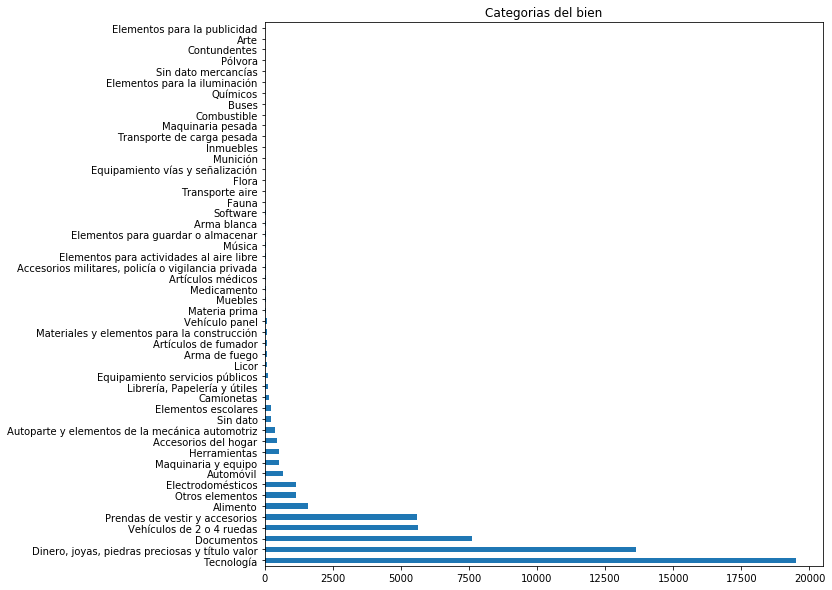

In [4]:
plt.figure(figsize=(10,10))
Medellin2019['Categoria_Bien'].value_counts().plot(kind='barh', title='Categorias del bien')

In [5]:
casos=pd.DataFrame(Medellin2019['Categoria_Bien'].value_counts())
casos.sort_values(by=['Categoria_Bien']).head(14)

,Categoria_Bien
Elementos para la publicidad,1
Arte,1
Contundentes,1
Pólvora,2
Sin dato mercancías,6
Elementos para la iluminación,6
Químicos,6
Buses,7
Combustible,8
Maquinaria pesada,8


In [6]:
filtro_bien=['Contundentes','Arte','Elementos para la publicidad','Pólvora','Químicos','Sin dato mercancías',
       'Elementos para la iluminación','Buses','Combustible','Maquinaria pesada','Inmuebles',
        'Transporte de carga pesada','Munición','Equipamiento vías y señalización','Sin dato']
filtro1=Medellin2019[~Medellin2019['Categoria_Bien'].isin(filtro_bien)]


##### Grupo de bienes

Se realiza filtro proceso de agrupación de las categorias

In [7]:
Grupo_bienes=[]
lista1=['Tecnología','Elementos para guardar o almacenar','Software']
lista2=['Dinero, joyas, piedras preciosas y título valor']
lista3=['Documentos']
lista4=['Vehículos de 2 o 4 ruedas','Automóvil','Autoparte y elementos de la mecánica automotriz','Camionetas','Vehículo panel',
    'Transporte aire']
lista5=['Prendas de vestir y accesorios']
lista6=['Alimento']
lista7=['Otros elementos','Elementos escolares','Librería, Papelería y útiles','Equipamiento servicios públicos','Licor',
       'Artículos de fumador','Medicamento','Artículos médicos','Elementos para actividades al aire libre','Música']
lista8=['Maquinaria y equipo','Herramientas','Materiales y elementos para la construcción','Materia prima']
lista9=['Electrodomésticos','Accesorios del hogar','Muebles']
lista10=['Arma de fuego','Accesorios militares, policía o vigilancia privada','Arma blanca']
lista11=['Fauna','Flora']
for i in range(0,len(filtro1)):
    if np.array(filtro1.Categoria_Bien)[i] in lista1:
        P='Tecnología'
    elif np.array(filtro1.Categoria_Bien)[i] in lista2:
        P='Dinero'
    elif np.array(filtro1.Categoria_Bien)[i] in lista3:  
        P='Documentos'
    elif np.array(filtro1.Categoria_Bien)[i] in lista4:   
        P='Vehículos'
    elif np.array(filtro1.Categoria_Bien)[i] in lista5:  
        P='Vestuario'
    elif np.array(filtro1.Categoria_Bien)[i] in lista6:   
        P='Alimentos'
    elif np.array(filtro1.Categoria_Bien)[i] in lista7:  
        P='Otros elementos'
    elif np.array(filtro1.Categoria_Bien)[i] in lista8:   
        P='Maquinas y herramientas'
    elif np.array(filtro1.Categoria_Bien)[i] in lista9:    
        P='Hogar'
    elif np.array(filtro1.Categoria_Bien)[i] in lista10:  
        P='Armas'
    else:
        P='Fauna y FLora'
    Grupo_bienes.append(P)
filtro1['Grupo_bienes']=Grupo_bienes

C:\Users\Familia Zapata\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


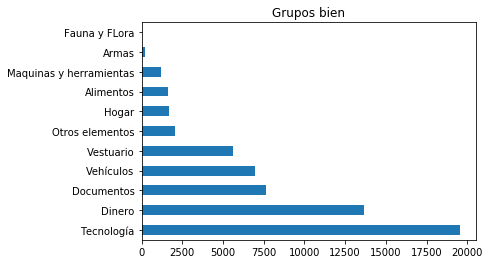

In [8]:
filtro1['Grupo_bienes'].value_counts().plot(kind='barh', title='Grupos bien')

#### Modalidad 
Corresponde al tipo de hurto realizado

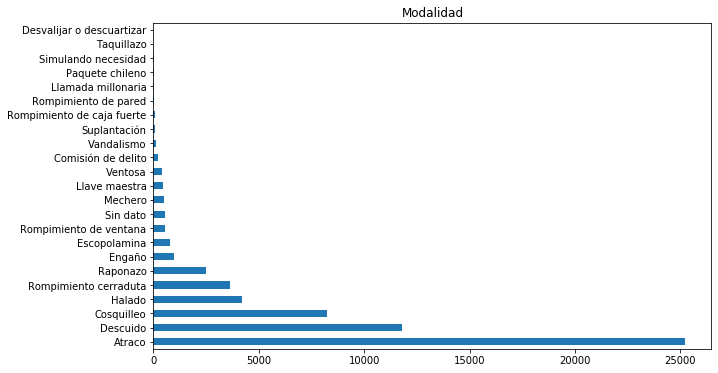

In [9]:
plt.figure(figsize=(10,6))
filtro1['Modalidad'].value_counts().plot(kind='barh', title='Modalidad')

In [10]:
Med2019=filtro1[filtro1['Modalidad'] != 'Sin dato']

Se convierten las datos a fechas

In [11]:
Med2019["convertido"]=pd.to_datetime(Med2019["Dia"],dayfirst=True)
Med2019["day"]=Med2019["convertido"].apply(lambda row:row.day)

C:\Users\Familia Zapata\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Familia Zapata\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


#### Días calendario

Basado en análisis descriptivos se crean grupos de días 

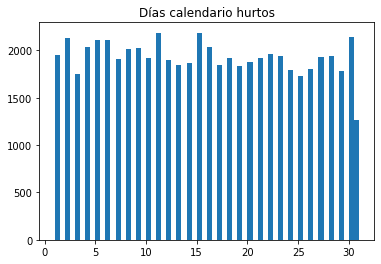

In [12]:
plt.title('Días calendario hurtos')
plt.hist(Med2019['day'],bins=60)
plt.show()

In [13]:
Grupo_dia1=[]
for i in range(0,len(Med2019)):
    if np.array(Med2019.day)[i]<=7:
        P=0
    elif np.array(Med2019.day)[i]>7 and np.array(Med2019.day)[i]<=15:
        P=1
    elif np.array(Med2019.day)[i]>15 and np.array(Med2019.day)[i]<=23:  
        P=2
    elif np.array(Med2019.day)[i]>23: 
        P=3
    else:
        P=0
    Grupo_dia1.append(P)
Med2019['Grupo_dia1']=Grupo_dia1

C:\Users\Familia Zapata\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
Grupo_dia2=[]
lista1=[2,4,5,6,8,9,11,15,16,30]
lista2=[1,2,10,12,18,21,22,23,27,28]
lista3=[3,13,14,17,19,20,24,25,26,29,31]
for i in range(0,len(Med2019)):
    if np.array(Med2019.day)[i] in lista1:
        P=0
    elif np.array(Med2019.day)[i] in lista2:
        P=1
    elif np.array(Med2019.day)[i] in lista3:  
        P=2
    else:
        P=0
    Grupo_dia2.append(P)
Med2019['Grupo_dia2']=Grupo_dia2

C:\Users\Familia Zapata\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


### Día nombre
Nombre del día de la semana en que se ejecuto el atraco

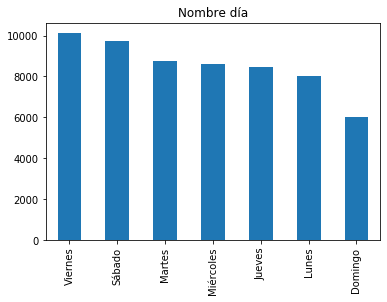

In [15]:
Med2019['Dia_nombre'].value_counts().plot(kind='bar', title='Nombre día')

#### Grupo Hora

Corresponde a la hora en que fue realizado el hurto, por lo cual se realiza la grupación enfocada en rangos de horario

In [16]:
Grupo_hora=[]
for i in range(0,len(Med2019)):
    if np.array(Med2019.loc[:,['Hora_Hurto']])[i]<=7:
        P=0
    elif np.array(Med2019.loc[:,['Hora_Hurto']])[i]>7 and np.array(Med2019.loc[:,['Hora_Hurto']])[i]<=12:
        P=1
    elif np.array(Med2019.loc[:,['Hora_Hurto']])[i]>12 and np.array(Med2019.loc[:,['Hora_Hurto']])[i]<=18:  
        P=2
    elif np.array(Med2019.loc[:,['Hora_Hurto']])[i]>18: 
        P=3
    else:
        P=0
    Grupo_hora.append(P)
Med2019['Grupo_hora']=Grupo_hora

C:\Users\Familia Zapata\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:
Grupo_hora2=[]
lista1=[20,19,18,10,11,21]
lista2=[17,7,15,16,12,9]
lista3=[6,14,8,5,13,3]
lista4=[22,2,4,0,1,23]
for i in range(0,len(Med2019)):
    if np.array(Med2019.Hora_Hurto)[i] in lista1:
        P=0
    elif np.array(Med2019.Hora_Hurto)[i] in lista2:
        P=1
    elif np.array(Med2019.Hora_Hurto)[i] in lista3:  
        P=2
    elif np.array(Med2019.Hora_Hurto)[i] in lista4:  
        P=3
    else:
        P=0
    Grupo_hora2.append(P)
Med2019['Grupo_hora2']=Grupo_hora2

C:\Users\Familia Zapata\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


#### Mes calendario
Mes del año en el que se ejecuto el hurto

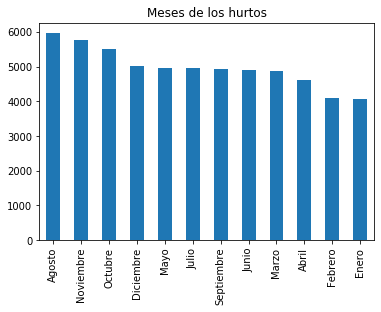

In [18]:
Med2019['Mes_Calendario'].value_counts().plot(kind='bar', title='Meses de los hurtos')

### Sede receptora
Sede donde se recpciono la denuncia del hurto

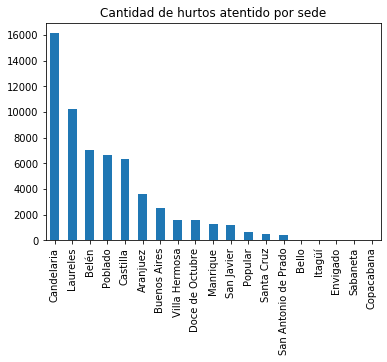

In [19]:
Med2019['Sede_Receptora'].value_counts().plot(kind='bar', title='Cantidad de hurtos atentido por sede')

In [23]:
Med2019.columns

Index(['Caso_Hurto', 'Dia', 'Dia_nombre', 'Mes_Calendario', 'Hora_Hurto',
       'Minuto_Hurto', 'Jornada', 'Bien', 'Categoria_Bien', 'Grupo_Bien',
       'Conducta_Especial', 'Conducta', 'Modalidad', 'Sexo', 'Edad_Hurto',
       'Rango_Edad', 'Rango_Edad_Pisc', 'Cod._Barrio', 'Barrio', 'Cod._Comuna',
       'Comuna', 'Geo_X_Hurto', 'Geo_Y_Hurto', 'Lugar', 'Grupo_Lugar',
       'Valor_Hurto', 'Estado_Civil', 'Medio_Transporte',
       'Medio_Transporte_Agresor', 'Sede_Receptora', 'Arma_Medio',
       'Grupo_bienes', 'convertido', 'day', 'Grupo_dia1', 'Grupo_dia2',
       'Grupo_hora', 'Grupo_hora2'],
      dtype='object')

In [24]:
Med2019.head()

,Caso_Hurto,Dia,Dia_nombre,Mes_Calendario,Hora_Hurto,Minuto_Hurto,Jornada,Bien,Categoria_Bien,Grupo_Bien,...,Medio_Transporte_Agresor,Sede_Receptora,Arma_Medio,Grupo_bienes,convertido,day,Grupo_dia1,Grupo_dia2,Grupo_hora,Grupo_hora2
0,1,1/01/2019,Martes,Enero,18,0,Noche,Moto,Vehículos de 2 o 4 ruedas,Vehículo,...,Caminata,Santa Cruz,Llave maestra,Vehículos,2019-01-01,1,0,1,2,0
1,1,1/01/2019,Martes,Enero,9,30,Mañana,Moto,Vehículos de 2 o 4 ruedas,Vehículo,...,Caminata,Buenos Aires,Llave maestra,Vehículos,2019-01-01,1,0,1,1,1
2,1,1/01/2019,Martes,Enero,11,15,Mañana,Moto,Vehículos de 2 o 4 ruedas,Vehículo,...,Caminata,Aranjuez,No,Vehículos,2019-01-01,1,0,1,1,0
3,1,1/01/2019,Martes,Enero,22,30,Noche,Moto,Vehículos de 2 o 4 ruedas,Vehículo,...,Caminata,Castilla,Llave maestra,Vehículos,2019-01-01,1,0,1,3,3
4,1,1/01/2019,Martes,Enero,20,40,Noche,Moto,Vehículos de 2 o 4 ruedas,Vehículo,...,Caminata,Candelaria,Llave maestra,Vehículos,2019-01-01,1,0,1,3,0


### Categorización de datos

Nuestro set de datos cuenta con un 97% de variables categóricas, con el fin de tener datos homogéneos y listos para ser entrenados, a través de nuestra herramienta objetivo Python realizamos una categorización numérica para nuestras variables categóricas.

Se realiza filtro de categorias las cuales no son objeto del estudio, ya que fueron agrupadas en procedimientos anteriores

In [59]:
basehurtosdef=Med2019.drop(['Dia','convertido'], axis=1)
basehurtosdefc = basehurtosdef
basehurtosdefc['Caso_Hurto']=basehurtosdefc.Caso_Hurto.astype("category").cat.codes
basehurtosdefc= basehurtosdefc.drop(['Mes_Calendario','Caso_Hurto','Barrio','Medio_Transporte','Categoria_Bien','Edad_Hurto','day','Minuto_Hurto','Grupo_Bien','Conducta_Especial','Conducta','Conducta','Cod._Barrio','Cod._Barrio','Cod._Comuna','Lugar','Estado_Civil','Bien','Dia_nombre','Hora_Hurto'], axis= 1)

### Transformamos las etiquetas en categorías

In [60]:
basehurtosdefc.rename(columns={'Cod._Comuna':'Cod_Comuna','Cod._Barrio':'Cod_Barrio'},inplace=True)

In [61]:
basehurtosdefc['Jornada']=basehurtosdefc.Jornada.astype("category").cat.codes
basehurtosdefc['Modalidad']=basehurtosdefc.Modalidad.astype("category").cat.codes
basehurtosdefc['Sexo']=basehurtosdefc.Sexo.astype("category").cat.codes
basehurtosdefc['Rango_Edad']=basehurtosdefc.Rango_Edad.astype("category").cat.codes
basehurtosdefc['Rango_Edad_Pisc']=basehurtosdefc.Rango_Edad_Pisc.astype("category").cat.codes
basehurtosdefc['Comuna']=basehurtosdefc.Comuna.astype("category").cat.codes
basehurtosdefc['Grupo_Lugar']=basehurtosdefc.Grupo_Lugar.astype("category").cat.codes
basehurtosdefc['Valor_Hurto']=basehurtosdefc.Valor_Hurto.astype("category").cat.codes
basehurtosdefc['Medio_Transporte_Agresor']=basehurtosdefc.Medio_Transporte_Agresor.astype("category").cat.codes
basehurtosdefc['Sede_Receptora']=basehurtosdefc.Sede_Receptora.astype("category").cat.codes
basehurtosdefc['Arma_Medio']=basehurtosdefc.Arma_Medio.astype("category").cat.codes
basehurtosdefc['Grupo_bienes']=basehurtosdefc.Grupo_bienes.astype("category").cat.codes

In [62]:
basehurtosdefc.reset_index()
basehurtosdefc.columns

Index(['Jornada', 'Modalidad', 'Sexo', 'Rango_Edad', 'Rango_Edad_Pisc',
       'Comuna', 'Geo_X_Hurto', 'Geo_Y_Hurto', 'Grupo_Lugar', 'Valor_Hurto',
       'Medio_Transporte_Agresor', 'Sede_Receptora', 'Arma_Medio',
       'Grupo_bienes', 'Grupo_dia1', 'Grupo_dia2', 'Grupo_hora',
       'Grupo_hora2'],
      dtype='object')

Se elimina la categoría bien y categoria bien, los cuales estan resumidos en la categoría creada Grupo_Bien, ya que no se quiere generar redundancia

In [39]:
base_kmodas = basehurtosdefc.drop(['Geo_X_Hurto','Geo_Y_Hurto'], axis=1)
base_kmodas

,Jornada,Modalidad,Sexo,Rango_Edad,Rango_Edad_Pisc,Comuna,Grupo_Lugar,Valor_Hurto,Medio_Transporte_Agresor,Sede_Receptora,Arma_Medio,Grupo_bienes,Grupo_dia1,Grupo_dia2,Grupo_hora,Grupo_hora2
0,2,7,0,4,2,8,3,2996,3,17,3,9,0,1,2,0
1,1,7,0,4,2,19,3,2905,3,3,3,9,0,1,1,1
2,1,7,1,4,2,10,10,2862,3,0,4,9,0,1,1,0
3,2,7,1,8,4,11,3,2574,3,5,3,9,0,1,3,3
4,2,7,1,7,3,1,10,2770,3,4,3,9,0,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60574,3,3,0,3,2,1,1,295,3,4,4,3,3,2,2,2
60575,2,0,0,7,4,1,10,2920,6,4,1,8,3,2,3,0
60576,3,0,1,7,4,1,1,1646,3,4,4,2,3,2,2,2
60577,3,5,0,8,4,7,3,1984,3,2,4,8,3,2,2,2


# Método no supervisado
## K modas

Con el fin detener un análisis sobre variables categóricas teniendo como objetivo encontrar grupos que demuestren homogeneidad en nuestro set de datos y aunque actualmente los métodos de no supervisados que buscan generar agrupaciones se enfocan en variables no categóricas, nuestro enfoque será entender y utilizar método que permita generar agrupaciones en dataset donde predomina las variables categóricas; de acuerdo a lo anterior, la aplicación se centrara en la moda de los datos cuyo algoritmo es representado como K modes, este utiliza un coeficiente de disimilitud para medir la proximidad de los clúster.

-	Medida de disimilitud:

Para este caso la inicialización del algoritmo estará dada por la medida de disimilitud Huang. 

Esta medida de disimilitud se define como la discrepancia entre dos objetos X y Y las cuales deberán ser dos variables categóricas, mientras existan un número menor de discrepancias se consideran que tienen mayor relación los objetos.[1]


- Cálculo del costo

Basado en lo anterior, como estamos trabajando con una medida de disimilitud para variables categóricas, se define una función de costo la cual tiene como objetivo calcular el costo total P contra todo el conjunto permitiendo hallar una cantidad de clusters óptima (k) que permita tener un proceso computacional eficiente, debido que este tipo de medidas requieren evaluar la coincidencia para resolver P_!, utilizando frecuencias para grupos en lugar de medias y la selección de modas.


### Inicialización k = 3

In [ ]:
! pip install kmodes

In [32]:
from kmodes.kmodes import KModes

In [63]:
# inicialmente seleccionaremos un k = 3 por defecto
km_Huang = KModes(n_clusters=2, init = "Huang", n_init = 1, verbose=1)
fitClusters_Huang = km_Huang.fit_predict(base_kmodas)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 13503, cost: 578463.0
Run 1, iteration: 2/100, moves: 1879, cost: 578463.0


Podemos observar los **centroides** elegidos basados en la moda

In [64]:
clusterCentroidsDf = pd.DataFrame(km_Huang.cluster_centroids_)
clusterCentroidsDf.columns = base_kmodas.columns
clusterCentroidsDf

,Jornada,Modalidad,Sexo,Rango_Edad,Rango_Edad_Pisc,Comuna,Grupo_Lugar,Valor_Hurto,Medio_Transporte_Agresor,Sede_Receptora,Arma_Medio,Grupo_bienes,Grupo_dia1,Grupo_dia2,Grupo_hora,Grupo_hora2
0,1,0,0,3,2,1,10,500,3,4,4,8,1,0,1,0
1,2,3,1,6,3,1,10,500,3,4,4,8,2,2,3,3


Ahora vamos a iterar el mismo algoritmo con el fin de encontrar los k grupos que minimizan la función del costo

### Elección del K

De acuerdo con lo anterior se ejecuta el modelo con el fin de realizar iteraciones que permitan minimizar el costo con el fin de hallar un k óptimo.



In [66]:
cost = []
for num_clusters in list(range(1,10)):
    kmode = KModes(n_clusters=num_clusters, init = "Huang", n_init = 1, verbose=1)
    kmode.fit_predict(base_kmodas)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 617894.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 10801, cost: 568715.0
Run 1, iteration: 2/100, moves: 686, cost: 568715.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 14893, cost: 547781.0
Run 1, iteration: 2/100, moves: 1986, cost: 547781.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 13622, cost: 535459.0
Run 1, iteration: 2/100, moves: 4309, cost: 535459.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 17459, cost: 515969.0
Run 1, iteration: 2/100, moves: 2711, cost: 515969.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 17858, cost

Obteniendo el siguiente gráfico que relaciona el costo vs el número de clúster

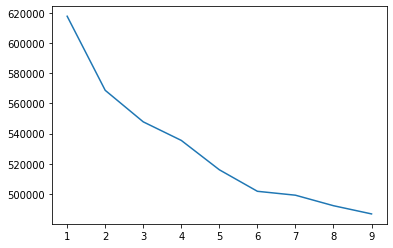

In [67]:
y = np.array([i for i in range(1,10,1)])
plt.plot(y,cost)

En este gráfico logramos evidenciar que existe un quiebre en el costo computacional en un k = 4 donde para k = 5 se mantiene la tendencia a la baja y posteriormente se evidencia de nuevo un quiebre en un k= 6. 

In [74]:
X = base_kmodas

In [77]:
base_kmodas

,Jornada,Modalidad,Sexo,Rango_Edad,Rango_Edad_Pisc,Comuna,Grupo_Lugar,Valor_Hurto,Medio_Transporte_Agresor,Sede_Receptora,Arma_Medio,Grupo_bienes,Grupo_dia1,Grupo_dia2,Grupo_hora,Grupo_hora2
0,2,7,0,4,2,8,3,2996,3,17,3,9,0,1,2,0
1,1,7,0,4,2,19,3,2905,3,3,3,9,0,1,1,1
2,1,7,1,4,2,10,10,2862,3,0,4,9,0,1,1,0
3,2,7,1,8,4,11,3,2574,3,5,3,9,0,1,3,3
4,2,7,1,7,3,1,10,2770,3,4,3,9,0,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60574,3,3,0,3,2,1,1,295,3,4,4,3,3,2,2,2
60575,2,0,0,7,4,1,10,2920,6,4,1,8,3,2,3,0
60576,3,0,1,7,4,1,1,1646,3,4,4,2,3,2,2,2
60577,3,5,0,8,4,7,3,1984,3,2,4,8,3,2,2,2


In [80]:
from sklearn.metrics import silhouette_samples, silhouette_score


In [99]:
clusterer = KModes(n_clusters=1, init = "Huang", n_init = 1, verbose=1)
cluster_labels = clusterer.fit_predict(base_kmodas)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 617894.0


In [101]:
cluster_labels+1

array([1, 1, 1, ..., 1, 1, 1], dtype=uint16)

In [103]:
slide = []
for num_clusters in list(range(2,11)):
    clusterer = KModes(n_clusters=num_clusters, init = "Huang", n_init = 1, verbose=1)
    cluster_labels = clusterer.fit_predict(base_kmodas)
    cluster_labels = clusterer.fit_predict(base_kmodas)
    silhouette_avg = silhouette_score(base_kmodas, cluster_labels)
    slide.append(silhouette_avg)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 19047, cost: 573159.0
Run 1, iteration: 2/100, moves: 5384, cost: 573159.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 10128, cost: 568751.0
Run 1, iteration: 2/100, moves: 0, cost: 568751.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 14910, cost: 544467.0
Run 1, iteration: 2/100, moves: 1701, cost: 544467.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 17583, cost: 544143.0
Run 1, iteration: 2/100, moves: 6755, cost: 541881.0
Run 1, iteration: 3/100, moves: 989, cost: 541881.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 19531, cost: 527315.0
Run 1, iteration: 2/100, moves: 1827, cost: 527315.0
Init: initializi

Adicionalmente se utiliza el método de la silueta que ofrece sklearn, el calcula utilizando la distancia media dentro del grupo (a) y la distancia media más cercana al grupo (b) para cada muestra. El coeficiente de silueta para una muestra es (b - a) / max (a, b). Para aclarar, b es la distancia entre una muestra y el grupo más cercano del que la muestra no forma parte, devolviendo un promedio, el mejor valor es 1 y el peor es -1. Los valores cercanos a 0 indican grupos superpuestos. Los valores negativos generalmente indican que se ha asignado una muestra al grupo incorrecto, ya que un grupo diferente es más similar.[3]

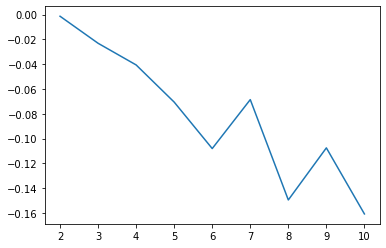

In [104]:
y = np.array([i for i in range(2,11,1)])
plt.plot(y,slide)

Para este ejercicio el gráfico de la silueta permite evidenciar que podrían existir algunos grupos superpuestos, sin embargo, este método busca estar lo más cercano a 1, dado que tenemos un problema con múltiples características esto influye en no tener unos grupos que cumplan a cabalidad con esta métrica; sin embargo, es claro que el k más cercano es el k = 4 por lo cual se realiza el ejercicio. Con el fin de complementar el ejercicio se itera esta métrica para los siguientes puntos de k = [4,5,6,7,8] donde podemos observar gráficamente la dimensión de los grupos y su interpretación de posición en la silueta.

Automatically created module for IPython interactive environment
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 19590, cost: 525813.0
Run 1, iteration: 2/100, moves: 2391, cost: 525813.0
For n_clusters = 4 The average silhouette_score is : -0.01890898389947905
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 23659, cost: 519224.0
Run 1, iteration: 2/100, moves: 8529, cost: 513804.0
Run 1, iteration: 3/100, moves: 2510, cost: 513804.0
For n_clusters = 5 The average silhouette_score is : -0.06353278480969347
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 12620, cost: 515674.0
Run 1, iteration: 2/100, moves: 4276, cost: 513669.0
Run 1, iteration: 3/100, moves: 197, cost: 513669.0
For n_clusters = 6 The average silhouette_score is : -0.048311124608847726
Init: initializing centroids
Init: initializin

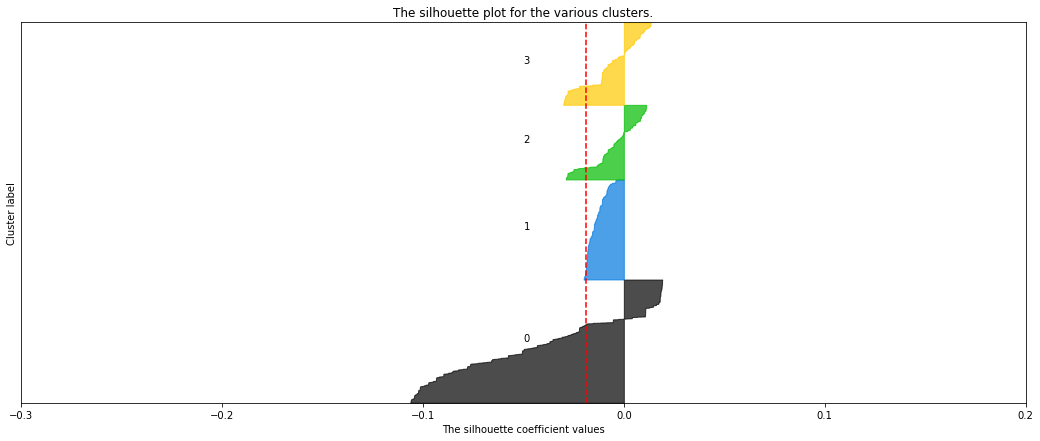

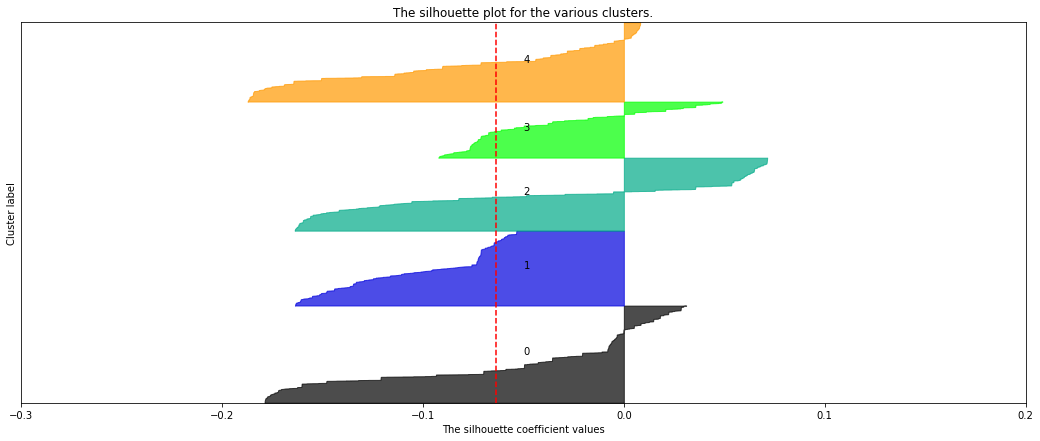

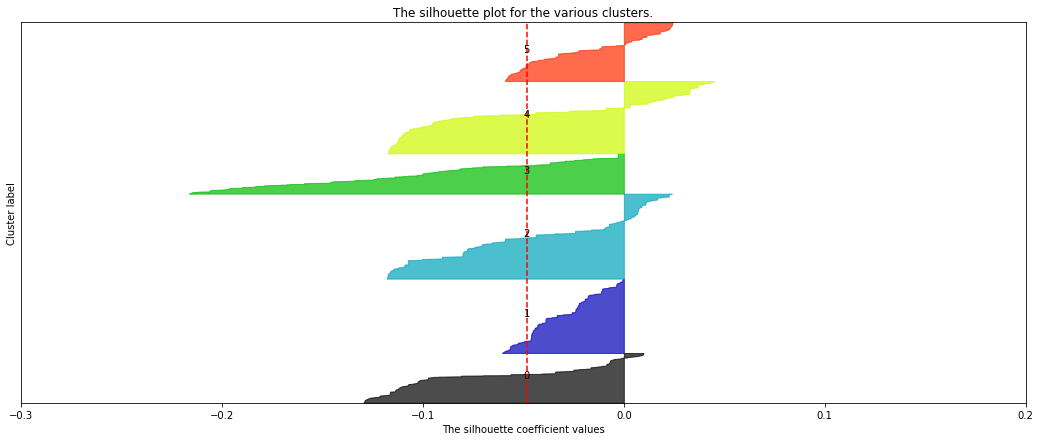

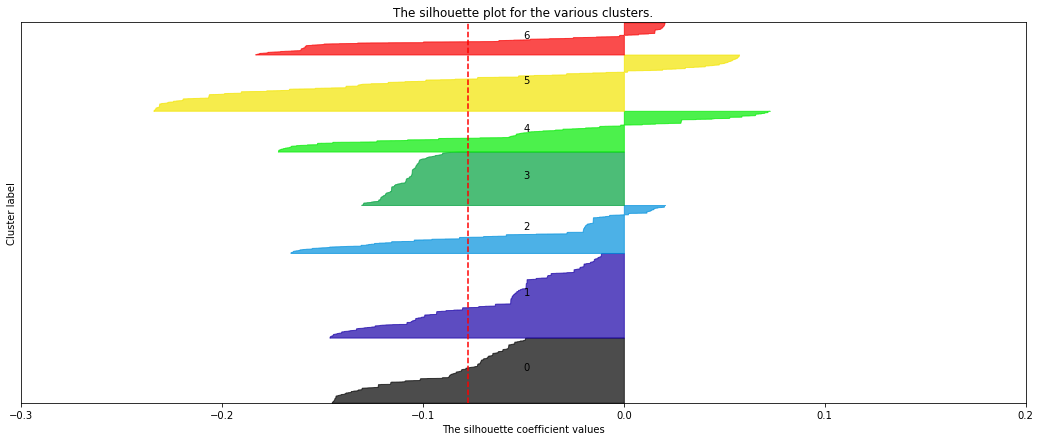

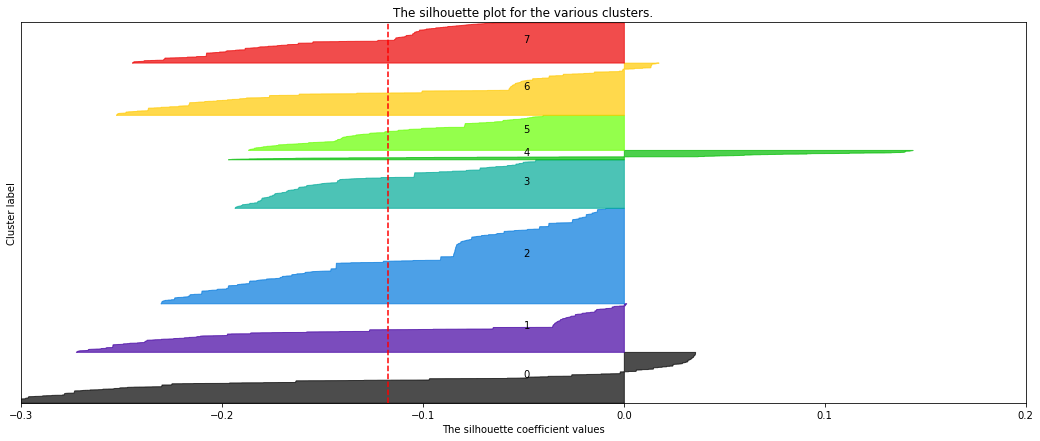

In [106]:
## from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.

range_n_clusters = [4, 5, 6,7,8]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 0])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KModes(n_clusters=n_clusters, init = "Huang", n_init = 1, verbose=1)     
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.3 , -0.2 , -0.1, 0, 0.1,0.2])

    # 2nd Plot showing the actual clusters formed
    #colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    #ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                #c=colors, edgecolor='k')

    # Labeling the clusters
    #centers = clusterer.cluster_centroids_
    # Draw white circles at cluster centers
    #ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
               # c="white", alpha=1, s=200, edgecolor='k')

    #for i, c in enumerate(centers):
        #ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    #s=50, edgecolor='k')

    #ax2.set_title("The visualization of the clustered data.")
    #ax2.set_xlabel("Feature space for the 1st feature")
    #ax2.set_ylabel("Feature space for the 2nd feature")

    #plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  #"with n_clusters = %d" % n_clusters),
                 #fontsize=14, fontweight='bold')

plt.show()

- Se evidencia que el grupo cero es el más alejado o el que tiene altos valores superpuestos, sin embargo, el 3 y 2 cumple con unos grupos homogéneos, de puede evidenciar que la mayor proporción esta abarcada por el cluster 0 y el grupo 1. Cabe aclarar que en todos los grupos hay representación de valores positivos, sin embargo, dado el contexto del problema variables como la comuna la Candelaria pueden influir en este ya que 





- Tienden unas densidades más homogéneas entre los grupos sin embargo los grupos tienden a tener una métrica cada vez más alejada del enfoque deseado.

De acuerdo a la función de costo se selecciona el **k** óptimo el cual bajo el método del codo representa un quiebre en el costo de procesimiento para las diferentes iternaciones realizadas sobre los **k**, siendo en este caso el **k = 4**

In [107]:
km_Huang = KModes(n_clusters=4, init = "Huang", n_init = 1, verbose=1)
fitClusters_Huang = km_Huang.fit_predict(base_kmodas)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 19891, cost: 518439.0
Run 1, iteration: 2/100, moves: 3228, cost: 517149.0
Run 1, iteration: 3/100, moves: 937, cost: 517149.0


In [108]:
clusterCentroidsDf = pd.DataFrame(km_Huang.cluster_centroids_)
clusterCentroidsDf.columns = base_kmodas.columns
clusterCentroidsDf

,Jornada,Modalidad,Sexo,Rango_Edad,Rango_Edad_Pisc,Comuna,Grupo_Lugar,Valor_Hurto,Medio_Transporte_Agresor,Sede_Receptora,Arma_Medio,Grupo_bienes,Grupo_dia1,Grupo_dia2,Grupo_hora,Grupo_hora2
0,0,0,1,4,2,1,10,500,3,4,4,8,2,1,0,2
1,3,0,0,6,3,2,10,500,3,10,1,2,3,2,2,1
2,1,3,1,7,4,1,10,500,3,4,4,8,1,0,1,1
3,2,0,0,3,2,1,10,500,3,4,4,8,1,0,3,0


In [110]:
basehurtosdef=Med2019.drop(['Dia','convertido'], axis=1)
basehurtosdefc = basehurtosdef
basehurtosdefc['Caso_Hurto']=basehurtosdefc.Caso_Hurto.astype("category").cat.codes
basehurtosdefc= basehurtosdefc.drop(['Mes_Calendario','Caso_Hurto','Barrio','Medio_Transporte','Categoria_Bien','Edad_Hurto','day','Minuto_Hurto','Grupo_Bien','Conducta_Especial','Conducta','Conducta','Cod._Barrio','Cod._Barrio','Cod._Comuna','Lugar','Estado_Civil','Bien','Dia_nombre','Hora_Hurto'], axis= 1)
base = basehurtosdefc

In [120]:
base_clust= base.reset_index()

In [121]:
clusterDF = pd.DataFrame(fitClusters_Huang)

In [122]:
clusterDF.columns = ['cluster_predicted']

In [126]:
combinedDF = pd.concat([base,clusterDF], axis=1).reset_index()

In [128]:
combinedDF = pd.concat([base_clust,clusterDF], axis=1).reset_index()

In [129]:
combinedDF = combinedDF.drop(['index','level_0'],axis=1)

In [166]:
combinedDF.to_csv('Categorizada.csv', index=False)

In [164]:
combinedDF

,Jornada,Modalidad,Sexo,Rango_Edad,Rango_Edad_Pisc,Comuna,Geo_X_Hurto,Geo_Y_Hurto,Grupo_Lugar,Valor_Hurto,Medio_Transporte_Agresor,Sede_Receptora,Arma_Medio,Grupo_bienes,Grupo_dia1,Grupo_dia2,Grupo_hora,Grupo_hora2,cluster_predicted
0,Noche,Halado,Hombre,25-28,18-28,2 Santa Cruz,"-75,54969917","6,29909867",Habitacional,5000000,Caminata,Santa Cruz,Llave maestra,Vehículos,0,1,2,0,3
1,Mañana,Halado,Hombre,25-28,18-28,9 Buenos Aires,"-75,53617064","6,22998405",Habitacional,4200000,Caminata,Buenos Aires,Llave maestra,Vehículos,0,1,1,1,0
2,Mañana,Halado,Mujer,25-28,18-28,4 Aranjuez,"-75,5571555","6,27821866",Transporte,4000000,Caminata,Aranjuez,No,Vehículos,0,1,1,0,0
3,Noche,Halado,Mujer,46-52,40-59,5 Castilla,"-75,56694979","6,30970945",Habitacional,2500000,Caminata,Castilla,Llave maestra,Vehículos,0,1,3,3,0
4,Noche,Halado,Mujer,39-45,29-39,10 La Candelaria,"-75,55488355","6,24808629",Transporte,3500000,Caminata,Candelaria,Llave maestra,Vehículos,0,1,3,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59666,Tarde,Descuido,Hombre,18-24,18-28,10 La Candelaria,"-75,57235063","6,24905821",Económica,50000,Caminata,Candelaria,No,Documentos,3,2,2,2,3
59667,Noche,Atraco,Hombre,39-45,40-59,10 La Candelaria,"-75,55797073","6,24829133",Transporte,4300000,Motocicleta con parrillero,Candelaria,Arma de fuego,Tecnología,3,2,3,0,3
59668,Tarde,Atraco,Mujer,39-45,40-59,10 La Candelaria,"-75,56622356","6,24795678",Económica,700000,Caminata,Candelaria,No,Dinero,3,2,2,2,0
59669,Tarde,Engaño,Hombre,46-52,40-59,16 Belen,"-75,59974741","6,23716185",Habitacional,1000000,Caminata,Belén,No,Tecnología,3,2,2,2,1


In [222]:
data= np.array(combinedDF)

### Análisis de Grupos

De acuerdo con lo anterior se obtiene un resultado de 4 grupos, dado que el objetivo de este tipo de algoritmos es caracterizar los datos se realiza a continuación un análisis descriptivo de los resultados.

### Clúster 0:
#### Resumen de descripción
-	Clúster con el 30.6% de los datos
-	Personas víctimas de hurtos en la madrugada
-	Modalidad de robo atraco y cosquilleo
-	Hurto cometido a hombres y mujeres
-	Personas víctimas entre los 18 y 28 años
-	Victimarios jóvenes entre los 18 y 29 años
-	Hurtos cometidos en la candelaria 
-	Denuncios realizados en sede policial de la candelaria
-	Por lo general el victimario no utiliza arma
-	Los principales elementos hurtados son tecnología, documentos y dinero
-	Días de hurto entre los 15 y 23 días del mes
-	Perteneces también hurtos entre los días 1,2,10,12,18,21,22,23,27,28 del mes
-	Los hurtos son cometidos en horas mayores a las 18 p.m y menores a las 7 a.m 
-	Algunas horas foco horas foco 20,19,21.

### Clúster 1:
#### Resumen de descripción:
con el 25,4% de los datos
-	Personas víctimas de hurtos en la tarde
-	Modalidad de robo atraco
-	Hurto cometido a hombre
-	Personas víctimas entre los 29 y 38 años
-	Victimarios jóvenes entre los 29 y 39 años
-	Hurtos cometidos en la Laureles
-	Denuncios realizados en sede policial de la Laureles
-	Por lo general el victimario arma de fuego.
-	Los principales elementos hurtados son dinero, tecnología y vehículos 
-	Días de hurto últimos 7 días del mes
-	Hurtos entre los días 3,13,14,17,19,20,24,25,26,29,31 del mes
-	Los hurtos son cometidos en horas mayores a las 18 p.m y menores a las 12 p.m y 18 p.m
-	Algunas horas foco horas foco 6,14,8,5,13,3

### Clúster 2:
#### Resumen de descripción:
-	Clúster con el 19,4% de los datos
-	Personas víctimas de hurtos en la mañana
-	Modalidad de robo descuido
-	Hurto cometido a mujeres
-	Personas víctimas entre los 39 y 45 años
-	Victimarios jóvenes entre los 40 y 59 años
-	Hurtos cometidos en la Candelaria
-	Denuncios realizados en sede policial de la Candelaria
-	Por lo general el victimario no uso de arma
-	Los principales elementos hurtados son tecnología, dinero, vehículos y documento
-	Días de hurto primeros 15 días del mes
-	Perteneces también hurtos entre los días 2,4,5,6,8,9,11,15,16,30 del mes
-	Los hurtos son cometidos en horas mayores las 7 a.m y 12 p.m

### Clúster 3:
#### Resumen de descripción:
-	Clúster con el 24,6% de los datos
-	Personas víctimas de hurtos en la noche
-	Modalidad de robo atraco
-	Hurto cometido a hombres
-	Personas víctimas entre los 18 y 24 años
-	Victimarios jóvenes entre los 18 y 29 años
-	Hurtos cometidos en la Candelaria y Poblado
-	Denuncios realizados en sede policial de la Candelaria y Laureles
-	Por lo general el victimario el no uso de arma seguido de arma cortopunzante y arma de fuego.
-	Los principales elementos hurtados son tecnología, dinero, vehículos y vehículos
-	Días de hurto primeros 15 días del mes
-	Perteneces también hurtos entre los días 2,4,5,6,8,9,11,15,16,30 del mes
-	Los hurtos son cometidos en horas mayores a las 18 p.m
-	Algunas horas foco horas foco 22,2,4,0,1,23


### Conclusiones
-	Para elegir un k óptimo el método de k modes utiliza según la literatura la medida del costo, sin embargo, al combinar o comparar esta medida con otras como métodos que miden la cohesión se evidencia que las métricas podrían no ser tan eficientes, sin embargo, ante tantas categorías corresponde a un método adaptado que es útil al momento de generar clasificación.
-	En nuestro ejercicio si bien se generó una descripción correcta de las características predominaron datos con clases que representan una gran proporción en el set de datos, como lo son la Comuna de la Candelaria donde se concentran los mayores robos en la ciudad de Medellín, lo que se convierte en una de la razón para que la métrica de la silueta genere un valor negativo y bajo nuestro k = 4 que tiende a cero, tener este tipo de datos podrían superponer los grupos.
-	Los datos categóricos deben ser tratados bajo medidas de disimilitud, ya que de estos deben ser comparado bajo este tipo de métricas, como recomendación general. 
-	Bajo el criterio de experto se hace coherente el resultado de los cluster, ya que aunque predominaba la categoría de atraco como modalidad, Candelaria como comuna y caminata como tipo de vehículo utilizado, factores que generan inseguridad como lo son las horas y días de hurto fueron bien calificados los cuales también estuvieron influenciados por el genero.


